# Project 2 Loan Prediction Dataset Playground
## Ryan Rosiak
## 10/4/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB

In [2]:
# import the data and view it
lp_df = pd.read_csv('./Dataset/loan-train.csv', header=0)
lp_df.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Shape of the data
lp_df.shape

(614, 13)

In [4]:
# Attributes
lp_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Description of dataset
lp_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Number of unique values per column
for col in lp_df.columns:
    print(col, ':', lp_df[col].nunique())

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [7]:
# Check how many NAN values are in each column
lp_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# CLEANING DATA
# Fix up some of the data to be of the correct decimal place
# First fix the loan amount in thousands
lp_df['LoanAmount'] = lp_df['LoanAmount'] * 1000
# Replace the NAN values in each column
lp_df['Gender'] = lp_df['Gender'].fillna('Not Specified')
lp_df['Married'] = lp_df['Married'].fillna('Not Specified')
lp_df['Dependents'] = lp_df['Dependents'].fillna(0)
lp_df['Self_Employed'] = lp_df['Self_Employed'].fillna('No')
lp_df['LoanAmount'] = lp_df['LoanAmount'].fillna(0)
lp_df['Loan_Amount_Term'] = lp_df['Loan_Amount_Term'].fillna(0)
lp_df['Credit_History'] = lp_df['Credit_History'].fillna(0)
lp_df.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158000.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168000.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,360.0,1.0,Semiurban,N


# Graph/Analysis Section:

## Preliminary Question 1
## Does marital status determine the range of money that you are applying for?

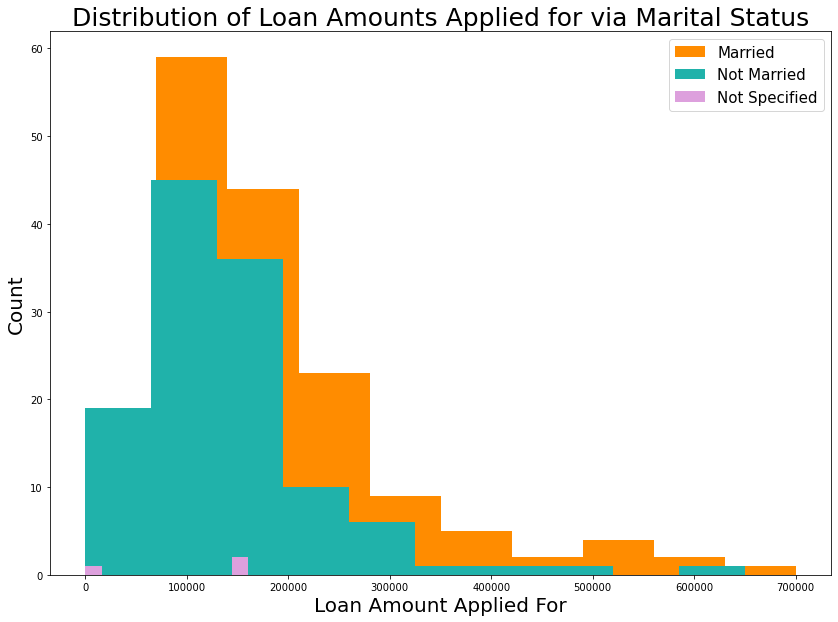

In [9]:
sub_lp_df = lp_df[['Married', 'LoanAmount']]

# Original Scatter Plot
# plt.figure(figsize=(14,10))
# plt.scatter(sub_lp_df['LoanAmount'], sub_lp_df['Married'], c='green', marker='p')
# plt.title('Marital Status vs. Loan Amount Applied For', fontsize=25)
# plt.xlabel('Loan Amount Applied For', fontsize=20)
# plt.ylabel('Marital Status', fontsize=20)
# plt.show()

# Creating a Histogram instead
married_group_loan_amount = sub_lp_df.loc[sub_lp_df['Married'] == 'Yes'].groupby(by='LoanAmount').count()
married_loan_amounts = married_group_loan_amount.reset_index()['LoanAmount']

not_married_group_loan_amount = sub_lp_df.loc[sub_lp_df['Married'] == 'No'].groupby(by='LoanAmount').count()
not_married_loan_amounts = not_married_group_loan_amount.reset_index()['LoanAmount']

not_specified_group_loan_amount = sub_lp_df.loc[sub_lp_df['Married'] == 'Not Specified'].groupby(by='LoanAmount').count()
not_specified_loan_amounts = not_specified_group_loan_amount.reset_index()['LoanAmount']

plt.figure(figsize=(14,10))
plt.hist(married_loan_amounts, color='darkorange')
plt.hist(not_married_loan_amounts, color='lightseagreen')
plt.hist(not_specified_loan_amounts, color='plum')
plt.title('Distribution of Loan Amounts Applied for via Marital Status', fontsize=25)
plt.xlabel('Loan Amount Applied For', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(['Married', 'Not Married', 'Not Specified'], fontsize=15)
plt.show()

## Preliminary Question 2
## Does education status determine a successful credit history check?

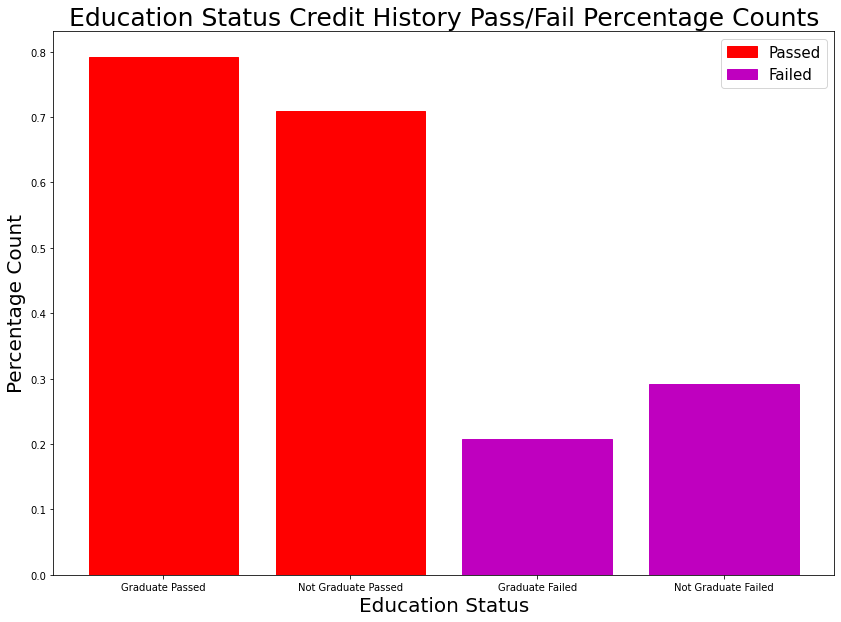

In [10]:
sub_lp_df = lp_df[['Education', 'Credit_History']]
graduate_total_passed_percentage = sub_lp_df.loc[(sub_lp_df['Education'] == 'Graduate') & (sub_lp_df['Credit_History'] == 1.0)].count() / sub_lp_df.loc[sub_lp_df['Education'] == 'Graduate'].count()
non_graduate_total_passed_percentage = sub_lp_df.loc[(sub_lp_df['Education'] == 'Not Graduate') & (sub_lp_df['Credit_History'] == 1.0)].count() / sub_lp_df.loc[sub_lp_df['Education'] == 'Not Graduate'].count()
graduate_total_failed_percentage = 1 - graduate_total_passed_percentage
non_graduate_total_failed_percentage = 1 - non_graduate_total_passed_percentage

plt.figure(figsize=(14,10))
barlist1 = plt.bar(['Graduate Passed', 'Not Graduate Passed'], [graduate_total_passed_percentage[0], non_graduate_total_passed_percentage[0]])
barlist2 = plt.bar(['Graduate Failed', 'Not Graduate Failed'], [graduate_total_failed_percentage[0], non_graduate_total_failed_percentage[0]])
barlist1[0].set_color('r')
barlist1[1].set_color('r')
barlist2[0].set_color('m')
barlist2[1].set_color('m')
plt.title('Education Status Credit History Pass/Fail Percentage Counts', fontsize=25)
plt.xlabel('Education Status', fontsize=20)
plt.ylabel('Percentage Count', fontsize=20)
plt.legend(['Passed', 'Failed'], fontsize=15)
plt.show()

## Preliminary Question 3
## Does applicant income determine loan amount applied for?

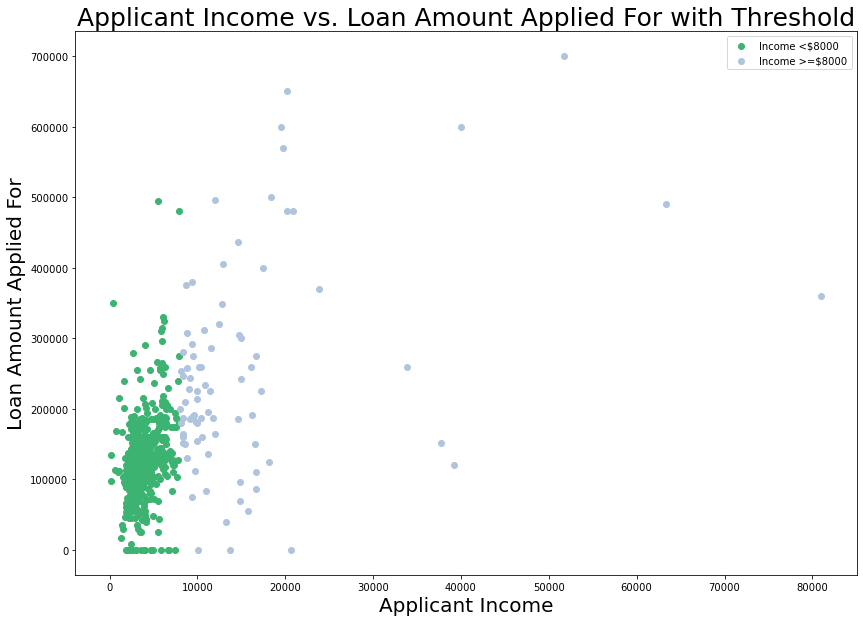

In [11]:
sub_lp_df = lp_df[['ApplicantIncome', 'LoanAmount']]
threshold = 8000
applicant_income_loan_amount_less_than_threshold = sub_lp_df.loc[sub_lp_df['ApplicantIncome'] < threshold]
applicant_income_loan_amount_greater_than_threshold = sub_lp_df.loc[sub_lp_df['ApplicantIncome'] >= threshold]
plt.figure(figsize=(14,10))
plt.scatter(applicant_income_loan_amount_less_than_threshold['ApplicantIncome'], applicant_income_loan_amount_less_than_threshold['LoanAmount'], c='mediumseagreen')
plt.scatter(applicant_income_loan_amount_greater_than_threshold['ApplicantIncome'], applicant_income_loan_amount_greater_than_threshold['LoanAmount'], c='lightsteelblue')
plt.title('Applicant Income vs. Loan Amount Applied For with Threshold', fontsize=25)
plt.xlabel('Applicant Income', fontsize=20)
plt.ylabel('Loan Amount Applied For', fontsize=20)
plt.legend(['Income <$8000', 'Income >=$8000'])
plt.show()

## Preliminary Question 4
## Does property area affect loan status?

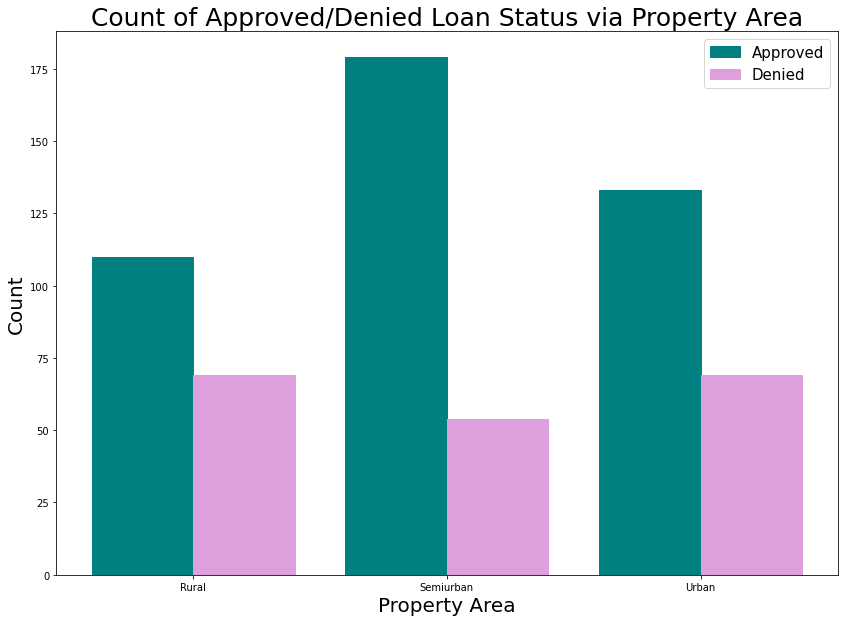

In [12]:
sub_lp_df = lp_df[['Property_Area', 'Loan_Status']]
property_area_approved = sub_lp_df.loc[sub_lp_df['Loan_Status'] == 'Y'].groupby(by='Property_Area').count()
property_area_denied = sub_lp_df.loc[sub_lp_df['Loan_Status'] == 'N'].groupby(by='Property_Area').count()
rural_approved, semiurban_approved, urban_approved = property_area_approved['Loan_Status']
rural_denied, semiurban_denied, urban_denied = property_area_denied['Loan_Status']

plt.figure(figsize=(14,10))
barlist1 = plt.bar(['Rural Approved', 'Semiurban Approved', 'Urban Approved'], [rural_approved, semiurban_approved, urban_approved], width=0.4)
barlist2 = plt.bar([0.4, 1.4, 2.4], [rural_denied, semiurban_denied, urban_denied], width=0.4)
list(map(lambda bar: bar.set_color('teal'), barlist1))
list(map(lambda bar: bar.set_color('plum'), barlist2))
plt.xticks(np.arange(0, 3, 1.0) + 0.4 / 2, ['Rural', 'Semiurban', 'Urban'])
plt.title('Count of Approved/Denied Loan Status via Property Area', fontsize=25)
plt.xlabel('Property Area', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(['Approved', 'Denied'], fontsize=15)
plt.show()

## Preliminary Question 5
## Is there a correlation between loan amount and loan amount term?

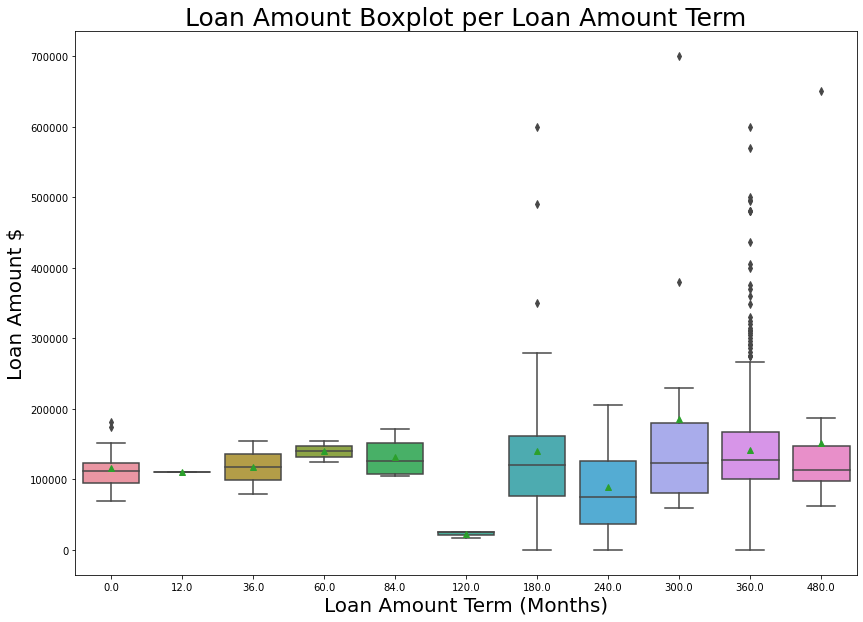

In [13]:
sub_lp_df = lp_df[['LoanAmount', 'Loan_Amount_Term']]
# Get rid of the non specified loan amount terms
sub_lp_df = sub_lp_df.loc[sub_lp_df['Loan_Amount_Term'] != 'Not Specified']

unique_loan_amount_terms = sub_lp_df['Loan_Amount_Term'].unique()
unique_loan_amount_terms.sort()
loan_amount_term_data_series = []
for loan_amount_term in unique_loan_amount_terms:
    loan_amount_term_data_series.append(sub_lp_df.loc[sub_lp_df['Loan_Amount_Term'] == loan_amount_term]['LoanAmount'])

plt.figure(figsize=(14,10))
ax = sns.boxplot(data=loan_amount_term_data_series, showmeans=True)
plt.title('Loan Amount Boxplot per Loan Amount Term', fontsize=25)
plt.xlabel('Loan Amount Term (Months)', fontsize=20)
plt.ylabel('Loan Amount $', fontsize=20)
ax.set_xticklabels(unique_loan_amount_terms)
plt.show()

# Machine Learning / Prediction Section:

In [14]:
# Get the test dataset
lp_df_test = pd.read_csv('./Dataset/loan-test.csv', header=0)
# Clean the data as done above
lp_df_test['LoanAmount'] = lp_df_test['LoanAmount'] * 1000
# Replace the NAN values in each column
lp_df_test['Gender'] = lp_df_test['Gender'].fillna('Not Specified')
lp_df_test['Married'] = lp_df_test['Married'].fillna('Not Specified')
lp_df_test['Dependents'] = lp_df_test['Dependents'].fillna(0)
lp_df_test['Self_Employed'] = lp_df_test['Self_Employed'].fillna('No')
lp_df_test['LoanAmount'] = lp_df_test['LoanAmount'].fillna(0)
lp_df_test['Loan_Amount_Term'] = lp_df_test['Loan_Amount_Term'].fillna(0)
lp_df_test['Credit_History'] = lp_df_test['Credit_History'].fillna(0)
lp_df_test.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110000.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126000.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208000.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100000.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78000.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152000.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59000.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147000.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280000.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123000.0,360.0,1.0,Semiurban


## Split and Transform the Data:

In [15]:
# CURRENTLY USING TRAIN DATA SINCE TEST DATA IS MISSING Y VALUES!!!!!!!!!

# For now use just the quantitative data
# ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
X_lp_train = lp_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
Y_lp_train = lp_df[['Loan_Status']]
# Change the Y values from N : Y to 0 : 1
Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'Y', 'Loan_Status'] = 1
# Split the data 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X_lp_train.values, Y_lp_train.values.ravel(), test_size=.3)
Y_train = Y_train.astype('int')
# Fit and transform the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

/home/ryan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-15-0914ed5db69a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
<ipython-input-15-0914ed5db69a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_lp_train.loc[Y_lp_train['Loan_Status'] =

# Logistic Regression:

In [16]:
# Compute the linear regression
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, Y_train)

## Cross Validation Score:

In [17]:
def print_cross_val_score_with_fold(classifier, x_train, y_train, fold, scoring):
    print(f'Fold = {fold}')
    print(f'Cross Validation Score: {cross_val_score(classifier, x_train, y_train, cv=fold, scoring=scoring)}')

In [18]:
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 3, "accuracy")
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 5, "accuracy")
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 7, "accuracy")

Fold = 3
Cross Validation Score: [0.6993007  0.68531469 0.65734266]
Fold = 5
Cross Validation Score: [0.70930233 0.68604651 0.68604651 0.6744186  0.65882353]
Fold = 7
Cross Validation Score: [0.70967742 0.70967742 0.70491803 0.70491803 0.67213115 0.63934426
 0.6557377 ]


## Confusion Matrix and Scores:

In [19]:
def print_confusion_matrix_and_stats(classifier, x_train, y_train, fold):
    y_train_pred_cross_value = cross_val_predict(classifier, x_train, y_train, cv=fold)
    print(f'Fold = {fold}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_train, y_train_pred_cross_value)}')
    print(f'Precision Score: {precision_score(y_train, y_train_pred_cross_value)}')
    print(f'Recall Score: {recall_score(y_train, y_train_pred_cross_value)}')
    print(f'F1 Score: {f1_score(y_train, y_train_pred_cross_value)}')

In [20]:
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 3)
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 5)
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 7)

Fold = 3
Confusion Matrix:
 [[  4 129]
 [  8 288]]
Precision Score: 0.6906474820143885
Recall Score: 0.972972972972973
F1 Score: 0.8078541374474054
Fold = 5
Confusion Matrix:
 [[  5 128]
 [  8 288]]
Precision Score: 0.6923076923076923
Recall Score: 0.972972972972973
F1 Score: 0.8089887640449438
Fold = 7
Confusion Matrix:
 [[  5 128]
 [  7 289]]
Precision Score: 0.6930455635491607
Recall Score: 0.9763513513513513
F1 Score: 0.8106591865357643


## Determining Thresholds:

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, fold):
    plt.figure(figsize=(14,10))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(['Precision', 'Recall'], fontsize=20)
    plt.title(f'Precision and Recall vs the Decision Threshold (Fold = {fold})', fontsize=25)
    plt.xlabel('Threshold', fontsize=20)
    plt.ylabel('Percentage', fontsize=20)
    plt.show()
    
def compute_scores_and_plot_precision_recall_vs_threshold(classifier, x_train, y_train, fold, method):
    Y_scores = cross_val_predict(classifier, x_train, y_train, cv=fold, method=method)
    precisions, recalls, thresholds = precision_recall_curve(y_train, Y_scores)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds, fold)

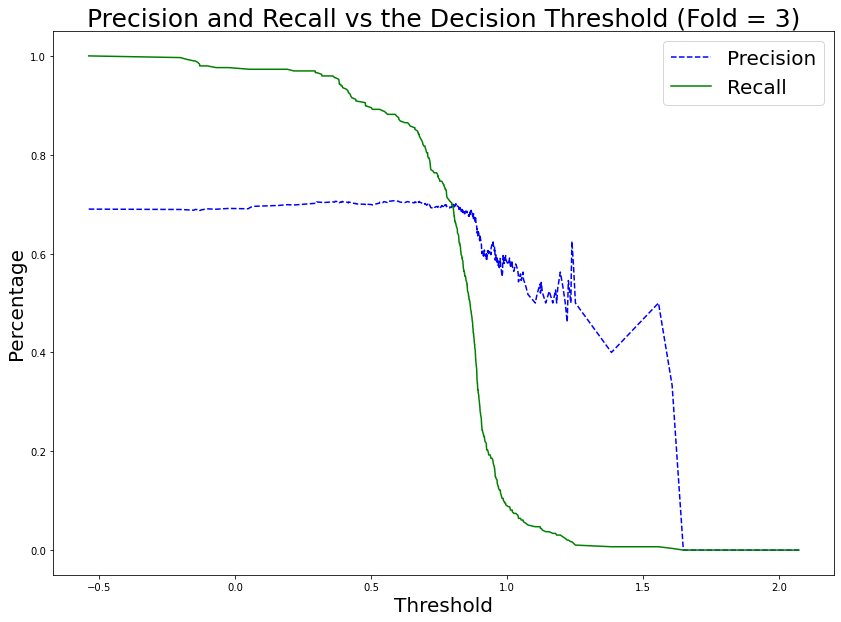

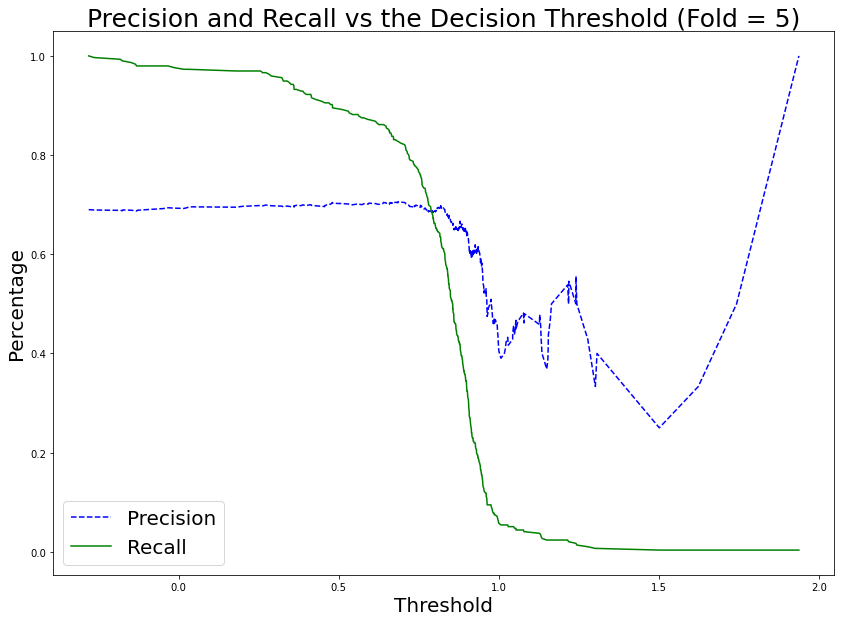

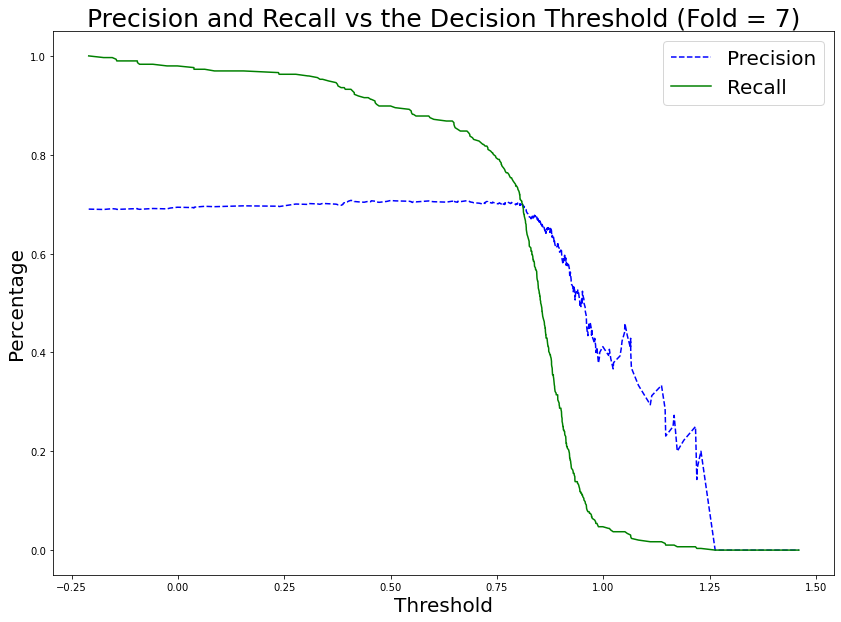

In [22]:
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 3, "decision_function")
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 5, "decision_function")
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 7, "decision_function")

## ROC Curve:

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(14,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Receiver Operating Characteristic Curve', fontsize=25)
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate (Recall)', fontsize=20)
    plt.show()
    
def plot_roc_curve_and_print_roc_auc_score(classifier, x_train, y_train, fold, method):
    Y_scores = cross_val_predict(classifier, x_train, y_train, cv=fold, method=method)
    print('ROC AUC Score:')
    print(roc_auc_score(y_train, Y_scores))
    fpr, tpr, thresholds = roc_curve(Y_train, Y_scores)
    plot_roc_curve(fpr, tpr)

ROC AUC Score:
0.4794503149766307


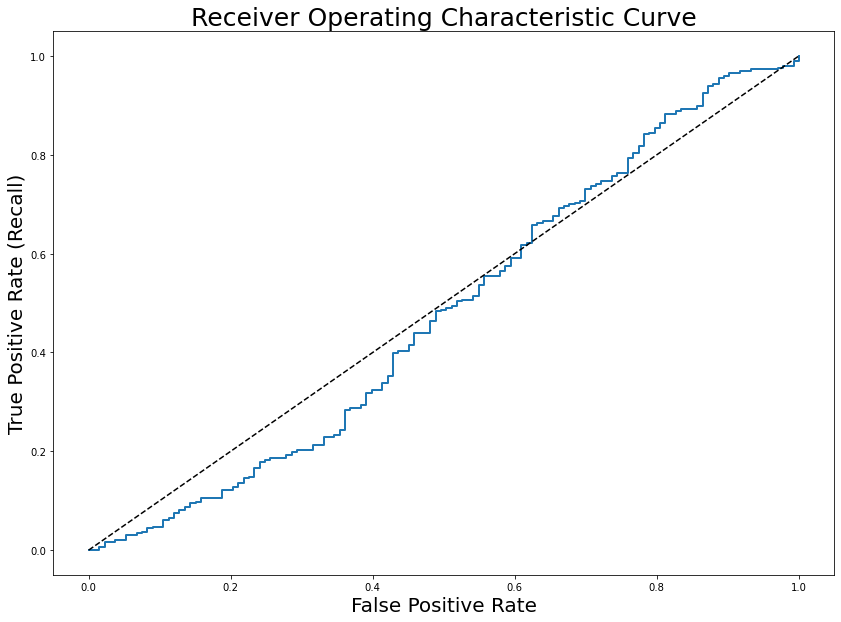

ROC AUC Score:
0.4605009144482829


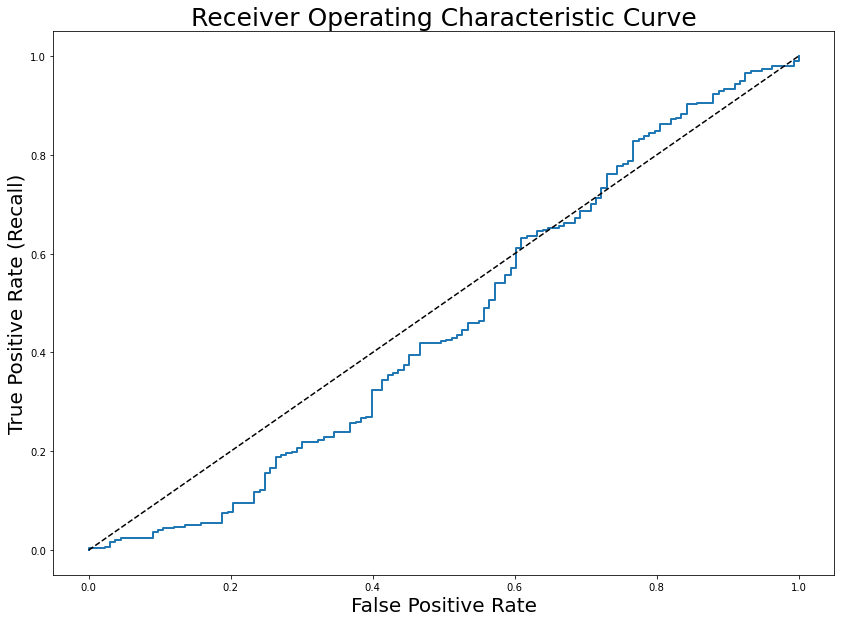

ROC AUC Score:
0.4505435887014835


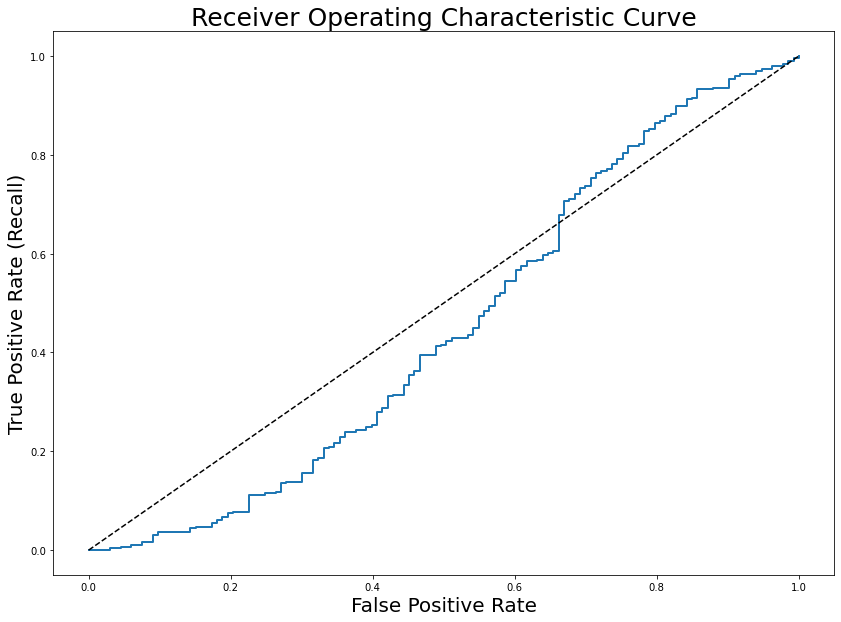

In [24]:
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 3, "decision_function")
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 5, "decision_function")
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 7, "decision_function")

## Accuracy Score:

In [49]:
def print_accuracy_score(y_train, y_pred):
    correct_predictions = 0
    for true, predicted in zip(y_train, y_pred):
        if true == predicted:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_train)
    print(f'Accuracy Score: {accuracy}')

def get_accuracy_score(y_train, y_pred):
    correct_predictions = 0
    for true, predicted in zip(y_train, y_pred):
        if true == predicted:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_train)
    return accuracy

In [50]:
y_predictions = log_reg.predict(X_train)
print_accuracy_score(Y_train, y_predictions)

Accuracy Score: 0.6899766899766899


## Running All Previous Tests w/ New Threshold

In [58]:
def get_threshold_list_and_corresponding_accuracy(classifier, x_test_data, y_test_data):
    # Creating a threshold list that will be used to test various "thresholds" for logistic regression accuracy
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    accuracy_per_threshold = []
    pred_proba_df = pd.DataFrame(classifier.predict_proba(x_test_data))
    for i in threshold_list:
        y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
        test_accuracy = get_accuracy_score(y_test_data, y_test_pred)
        accuracy_per_threshold.append(test_accuracy)
    return threshold_list, accuracy_per_threshold

def plot_accuracy_vs_threshold(threshold_list, accuracy_list):
    # Plot the accuracies over a threshold change
    plt.figure(figsize=(14,10))
    plt.plot(threshold_list, accuracy_list, c='red')
    plt.xlabel('Threshold', fontsize=20)
    plt.ylabel('Accuracy %', fontsize=20)
    plt.title('Accuracy vs. Threshold Logistic Regression', fontsize=25)
    plt.show()

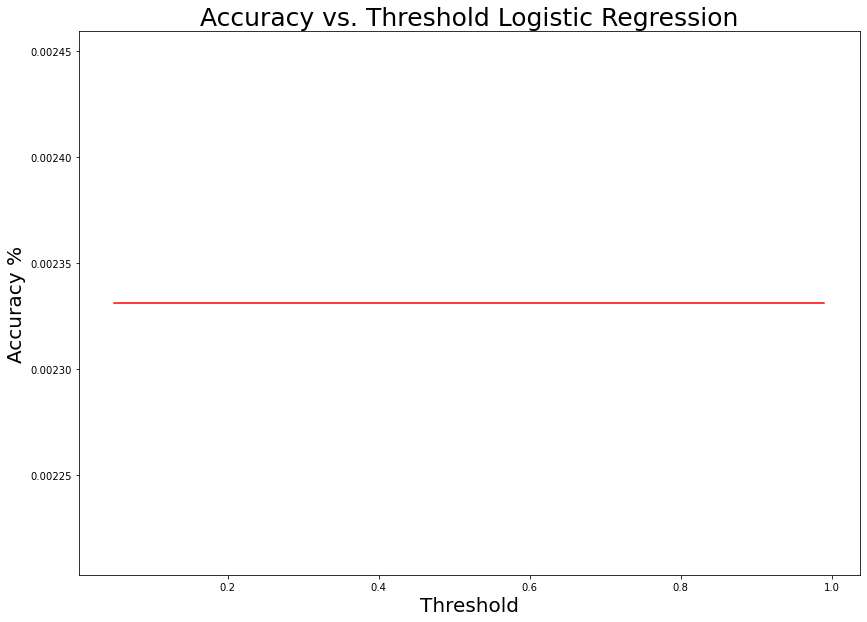

In [59]:
# Run the tests
threshold_list, accuracy_per_threshold = get_threshold_list_and_corresponding_accuracy(log_reg, X_train, Y_train)
plot_accuracy_vs_threshold(threshold_list, accuracy_per_threshold)

## Graph of Accuracy vs. Train/Test Split

In [67]:
def compute_testtrain_split_accuracy():
    test_size_list = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8]
    accuracy_list = []
    for i in test_size_list:
        X_train, X_test, Y_train, Y_test = train_test_split(X_lp_train.values, Y_lp_train.values.ravel(), test_size=i)
        Y_train = Y_train.astype('int')
        log_reg = LogisticRegression()
        log_reg = log_reg.fit(X_train, Y_train)
        y_predictions = log_reg.predict(X_train)
        accuracy_list.append(get_accuracy_score(Y_train, y_predictions))
    return test_size_list, accuracy_list

def plot_testtrain_slit_vs_accuracy(test_size_list, accuracy_list):
    plt.figure(figsize=(18,12))
    plt.plot(test_size_list, accuracy_list, c='purple')
    plt.xlabel(f'Test Size (Train = 1 - Test Size)', fontsize=25)
    plt.ylabel('Accuracy %', fontsize=25)
    plt.title('Test/Train Split vs. Accuracy', fontsize=30)
    plt.show()

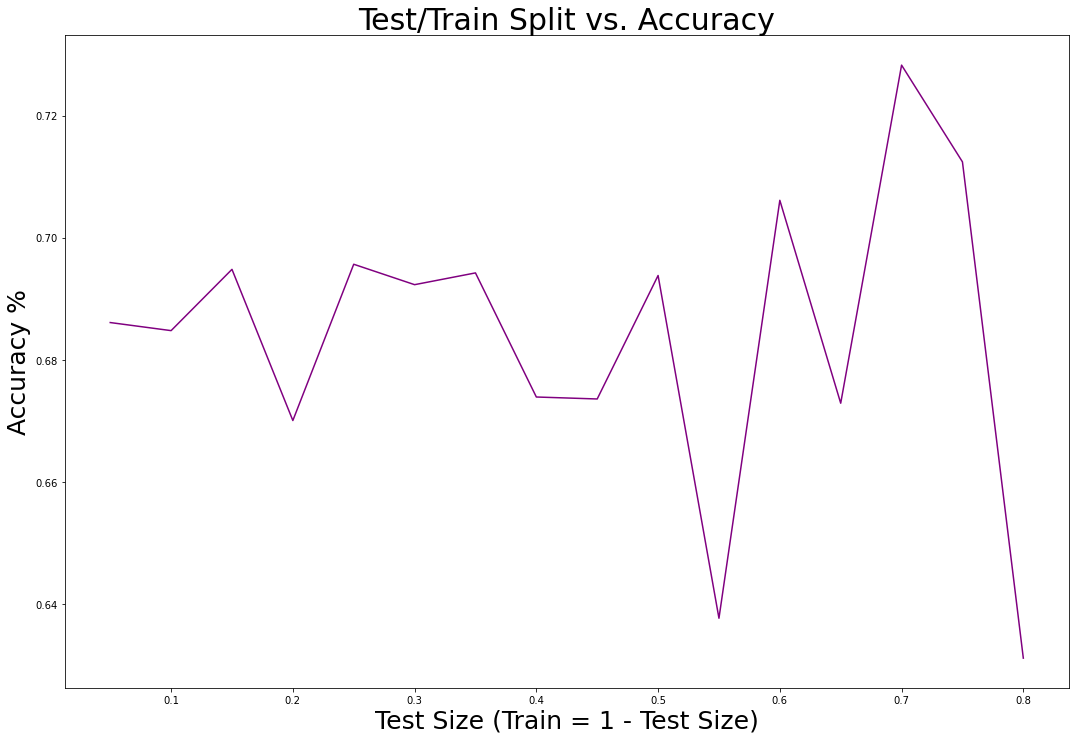

In [68]:
test_size_list, accuracy_list = compute_testtrain_split_accuracy()
plot_testtrain_slit_vs_accuracy(test_size_list, accuracy_list)